In [1]:
# !pip install torchinfo

In [2]:
import torch
import torch.nn as nn

In [3]:
cfgs = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [4]:
class VGG(nn.Module):
    def __init__(self, cfg, batch_norm, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = self.make_layers(cfg, batch_norm)
        self.avgpool = nn.AdaptiveAvgPool2d((7,7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096,4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


    cfgs = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
    }

    def make_layers(self, cfg, batch_norm = False):
        layers = []
        in_channels = 3
        for v in cfg:
            if v == 'M':
                layers += [nn.MaxPool2d(2,2)]
            else:
                conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
                if batch_norm:
                    layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(True)]
                else:
                    layers += [conv2d, nn.ReLU(True)]
                in_channels = v
        return nn.Sequential(*layers)


In [5]:
from torchinfo import summary

model_vgg16_bn = VGG(cfgs['D'], batch_norm=True)
summary(model_vgg16_bn, input_size=(2,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [2, 1000]                 --
├─Sequential: 1-1                        [2, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [2, 64, 224, 224]         1,792
│    └─BatchNorm2d: 2-2                  [2, 64, 224, 224]         128
│    └─ReLU: 2-3                         [2, 64, 224, 224]         --
│    └─Conv2d: 2-4                       [2, 64, 224, 224]         36,928
│    └─BatchNorm2d: 2-5                  [2, 64, 224, 224]         128
│    └─ReLU: 2-6                         [2, 64, 224, 224]         --
│    └─MaxPool2d: 2-7                    [2, 64, 112, 112]         --
│    └─Conv2d: 2-8                       [2, 128, 112, 112]        73,856
│    └─BatchNorm2d: 2-9                  [2, 128, 112, 112]        256
│    └─ReLU: 2-10                        [2, 128, 112, 112]        --
│    └─Conv2d: 2-11                      [2, 128, 112, 112]        147,

In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [7]:
model = torchvision.models.vgg16_bn(weights='VGG16_BN_Weights.IMAGENET1K_V1')

In [8]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

데이터 전처리
- 이미지 변환은 이미지 데이터의 크기를 256으로 키웠다가 224로 중앙 자르기 수행
- 탐지하려는 객체가 중앙에 위치할 확률이 높으므로 불필요한 지역특징을 제거하기 위한 전처리 방법

- 입력 이미지 크기를 224로 바로 리사이즈 할 수도 있지만, 그러면 검출하려는 객체의 크기가 더 작아질 수 있음

일반적으로 **사전학습(pretrained) 모델**을 사용할 때는 ImageNet으로 학습된 모델의 입력 분포에 맞추기 위해 같은 정규화 값(평균, 표준편차)을 사용합니다.

- **사전학습 모델 활용 시**:  
  - ImageNet으로 학습된 모델은 입력 이미지가 이 정규화 값을 기준으로 전처리되었을 때 최적의 성능을 보입니다.
  - 따라서 새로운 데이터셋이 ImageNet과 유사한 분포(자연 이미지 등)를 가진다면 같은 값을 사용하는 것이 좋습니다.

- **새로운 데이터셋이 ImageNet과 많이 다를 경우**:  
  - 만약 데이터셋의 특성이 크게 다르다면(예: 의료 영상, 위성 사진 등)  
  - 새로운 데이터셋 자체의 평균과 표준편차를 계산하여 사용하는 것이 더 적합할 수 있습니다.

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from collections import defaultdict

# 0 --> cat /  1 --> dog
def label_to_str(label):
    return 'Cat' if label == 0 else "Dog"

def visualize_by_category(dataset, n_samples=5, cmap=None):
    samples = defaultdict(list)
    # 데이터셋을 순회하면서 각 카테고리별로 n_samples 개씩 수집
    for img, label in dataset:
        if len(samples[label]) < n_samples:
            samples[label].append(img)
        # 두 카테고리 모두 n_samples가 모이면 종료
        if len(samples) == 2 and all(len(imgs) >= n_samples for imgs in samples.values()):
            break

    # 수집된 각 카테고리별로 이미지 그리드 생성 및 시각화
    for labels, imgs in samples.items():
        # make_grid를 사용하기 전에 각 이미지의 크기가 동일한지 확인합니다.
        grid_img = torchvision.utils.make_grid(imgs, nrow=n_samples, padding=2)
        plt.figure(figsize=(n_samples * 2, 4))
        # C, H ,W --> H, W, C
        plt.imshow(grid_img.permute(1,2,0).numpy(), cmap=cmap)
        plt.title(f"Category : {label_to_str(label)}")
        plt.axis('off')
        plt.show()

In [15]:
dataset  = torchvision.datasets.OxfordIIITPet(
    root = './data',
    download=True,
    target_types="binary-category", # 0:cat, 1:dog
    split='trainval',
    transform=transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ])
)

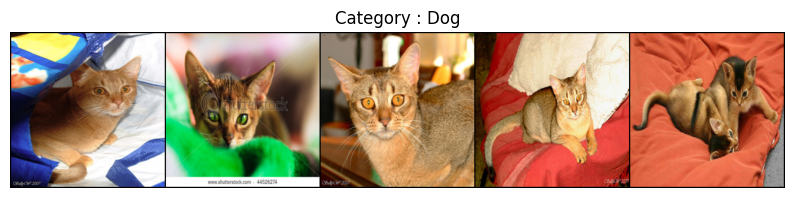

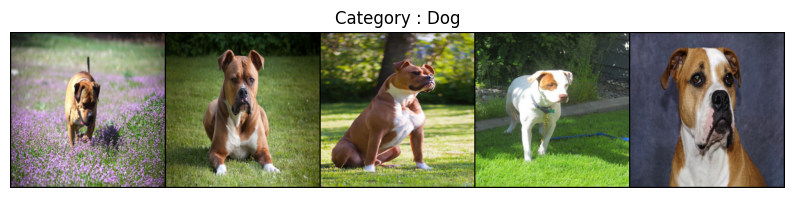

In [16]:
visualize_by_category(dataset, n_samples=5, cmap=None)

In [17]:
import torch, torchvision
import torchvision.transforms as T
from torch.utils.data import random_split, DataLoader

IMG_MEAN = [0.485, 0.456, 0.406]  # ImageNet 통계
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD)
])

val_tf = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD)
])

full_ds = torchvision.datasets.OxfordIIITPet(
    root='./data',
    split="trainval",
    target_types='binary-category',
    download=True,
    transform=train_tf
)

train_len = int(len(full_ds) * 0.8)
val_len = int(len(full_ds)-train_len)
train_ds, val_ds = random_split(full_ds, [train_len, val_len])
val_ds.dataset.transform = val_tf

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

In [19]:
import torch.nn as nn
from torchvision.models import vgg16, VGG16_Weights
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
model.classifier[6] = nn.Linear(4096, 2)
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
sched = torch.optim.lr_scheduler.StepLR(optim, step_size=5, gamma=0.1)
# 학습률 스케줄러: 5 epoch마다 lr를 1/10로 감소
# → 초반에는 빠르게 학습하고, 일정 단계 이후에는 작은 lr로 미세 조정

train_acc_hist, val_acc_hist = [], []
EPOCHS = 10
for epoch in range(EPOCHS):
    # train
    model.train()
    corr = tot = 0
    for x,y in tqdm(train_loader):
        x,y = x.to(device), y.to(device)

        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optim.step()
        optim.zero_grad()

        corr += (out.argmax(1)==y).sum().item()
        tot += y.size(0)
    train_acc_hist.append(corr/tot)

    # val
    model.eval()
    corr = tot = 0
    with torch.no_grad():
        for x,y in val_loader:
            x,y = x.to(device), y.to(device)
            out = model(x)
            corr += (out.argmax(1)==y).sum().item()
            tot += y.size(0)
    val_acc_hist.append(corr/tot)

    print(f"{epoch+1} train:{train_acc_hist[-1]:.4f}, val:{val_acc_hist[-1]:.4f}")
    sched.step()

cuda


100%|██████████| 92/92 [00:28<00:00,  3.22it/s]


1 train:0.6865, val:0.7351


100%|██████████| 92/92 [00:28<00:00,  3.20it/s]


2 train:0.7395, val:0.8003


100%|██████████| 92/92 [00:28<00:00,  3.22it/s]


3 train:0.8145, val:0.8193


100%|██████████| 92/92 [00:28<00:00,  3.19it/s]


4 train:0.8465, val:0.8587


100%|██████████| 92/92 [00:28<00:00,  3.21it/s]


5 train:0.8944, val:0.9198


100%|██████████| 92/92 [00:29<00:00,  3.12it/s]


6 train:0.9528, val:0.9348


100%|██████████| 92/92 [00:28<00:00,  3.22it/s]


7 train:0.9684, val:0.9457


100%|██████████| 92/92 [00:28<00:00,  3.25it/s]


8 train:0.9704, val:0.9484


100%|██████████| 92/92 [00:28<00:00,  3.25it/s]


9 train:0.9847, val:0.9620


100%|██████████| 92/92 [00:28<00:00,  3.18it/s]


10 train:0.9891, val:0.9497


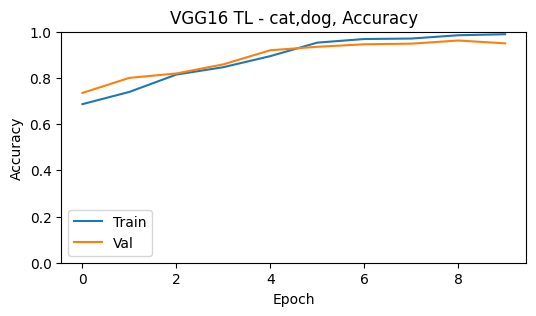

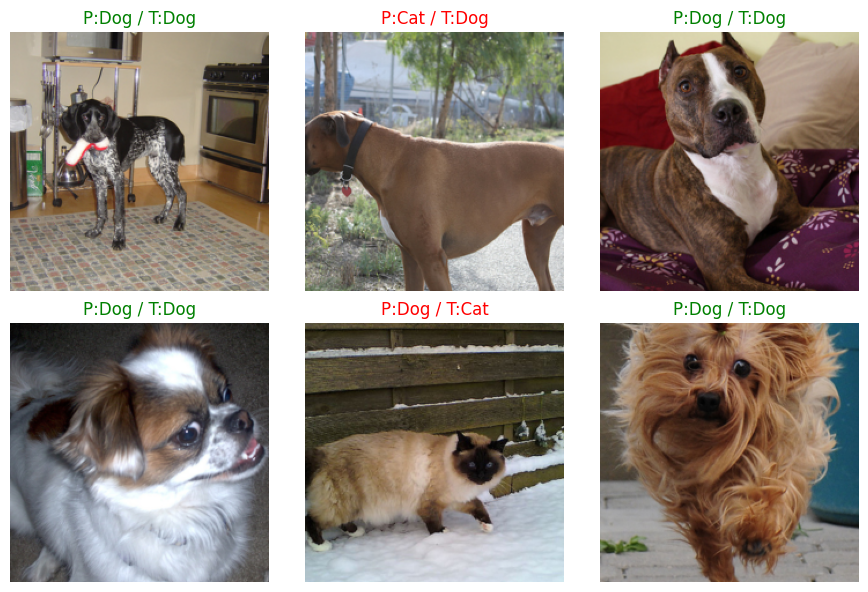

In [28]:
plt.figure(figsize=(6,3))
plt.plot(train_acc_hist, label="Train")
plt.plot(val_acc_hist, label="Val")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("VGG16 TL - cat,dog, Accuracy")
plt.legend()
plt.show()

import random
model.eval()
samples = random.sample(range(len(val_ds)), 6)
fig, axes = plt.subplots(2,3,figsize=(9,6))
for ax, idx in zip(axes.flatten(), samples):
    img, label = val_ds[idx]
    with torch.no_grad():
        pred = model(img.unsqueeze(0).to(device)).argmax(1).item()
    ax.imshow(img.permute(1,2,0).mul(torch.tensor(IMG_STD)).add(torch.tensor(IMG_MEAN)).clamp(0,1))
    ax.set_title(f"P:{'Dog' if pred else 'Cat'} / T:{'Dog' if label else 'Cat'}",
                 color=('g' if pred == label else 'r'))
    ax.axis('off')
plt.tight_layout()
plt.show()